# Each City Data format and combining the dataset into one

In [29]:
# Similar like chennai just change the file and format unstructured data to structured data

In [5]:
import json
import pandas as pd

df = pd.read_excel("./data/chennai_cars.xlsx")

In [11]:
import json
import pandas as pd

df = pd.read_excel("./data/chennai_cars.xlsx")

new_data = []
def format_json(item):
    data = item.replace("'", '"')
    data = data.replace("None", "null")
    return data

for index, row in df.iterrows():
    new_car_detail = format_json(row['new_car_detail'])
    new_car_overview = format_json(row['new_car_overview'])
    new_car_feature = format_json(row['new_car_feature'])
    new_car_specs = format_json(row['new_car_specs'])

    try:
        car_details = json.loads(new_car_detail)
    
        car_overview = json.loads(new_car_overview)
        top_data = car_overview.get('top', [])

        car_feature = json.loads(new_car_feature)

        combined_row = car_details.copy()
    
        for item in top_data:
            key_column_name = item.get('key', '').replace(' ', '_')
            combined_row[key_column_name] = item.get('value', '')

        features = car_feature.get('top', [])
        if isinstance(features, list):
            feature_values = [item.get('value', '') for item in features]
            combined_row['Features'] = ', '.join(feature_values)  # Combine all features into a single string
        else:
            combined_row['Features'] = ''

        # Extract nested data if needed
        sections = car_feature.get('data', [])
        for section in sections:
            sub_heading = section.get('subHeading', '').replace(' ', '_')
            section_list = [item.get('value', '') for item in section.get('list', [])]
            combined_row[sub_heading] = ', '.join(section_list)

        new_data.append(combined_row)

    except json.JSONDecodeError as e:
        print(f"Error parsing row {index}: {e}")

new_df = pd.DataFrame(new_data)

csv_file_name = "chennai_cars_dataset.csv"
new_df.to_csv(csv_file_name, index=False)

print(f"Data successfully saved to {csv_file_name}")

Data successfully saved to parsed_full_dataset.csv


In [24]:
import pandas as pd
import glob
import os

# Define the path pattern for your CSV files
csv_files_pattern = './structured_data/*.csv'

# List to hold DataFrames
dataframes = []

# Read each CSV file
for file in glob.glob(csv_files_pattern):
    df = pd.read_csv(file)
                     
    base_file_name = os.path.basename(file).replace('.csv', '')

    split_file_name = base_file_name.split('_')[0]
    
    df['city'] = split_file_name
    
    dataframes.append(df)

# List of columns you want to keep
required_columns = ['city', 'model','registration_year', 'ownership', 'price','km','fuel_type','transmission','mileage', 'max_power', 'torque', 'seats']

# Filter columns and concatenate DataFrames
filtered_dfs = []
for df in dataframes:
    # Keep only the required columns
    filtered_df = df[required_columns]
    filtered_dfs.append(filtered_df)

# Concatenate all filtered DataFrames
combined_df = pd.concat(filtered_dfs, ignore_index=True)

combined_df.dropna(inplace=True)

# Save the combined DataFrame to a new CSV file
# combined_df.to_csv('car_prediction_dataset.csv', index=False)

# print("New CSV file with required columns has been created.")


In [25]:
combined_df

,city,model,registration_year,ownership,price,km,fuel_type,transmission,mileage,max_power,torque,seats
0,bangalore,Maruti Celerio,2015,Third Owner,₹ 4 Lakh,"1,20,000",Petrol,Manual,23.1 kmpl,67.04bhp,90Nm,5.0
1,bangalore,Ford Ecosport,Feb 2018,Second Owner,₹ 8.11 Lakh,"32,706",Petrol,Manual,17 kmpl,121.31bhp,150Nm,5.0
2,bangalore,Tata Tiago,Sept 2018,First Owner,₹ 5.85 Lakh,"11,949",Petrol,Manual,23.84 kmpl,84bhp,114Nm,5.0
3,bangalore,Hyundai Xcent,Dec 2014,First Owner,₹ 4.62 Lakh,"17,794",Petrol,Manual,19.1 kmpl,81.86bhp,113.75Nm,5.0
4,bangalore,Maruti SX4 S Cross,2015,First Owner,₹ 7.90 Lakh,"60,000",Diesel,Manual,23.65 kmpl,88.5bhp,200Nm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8363,delhi,Mahindra Scorpio,Oct 2016,First Owner,₹ 8.40 Lakh,"71,000",Diesel,Manual,15.4 kmpl,120bhp,280Nm,7.0
8364,delhi,Honda City,2019,First Owner,₹ 9 Lakh,"60,000",Petrol,Automatic,18 kmpl,117.6bhp,145Nm,5.0
8365,delhi,Kia Sonet,2021,First Owner,₹ 9.50 Lakh,"20,000",Petrol,Manual,18.4 kmpl,81.86bhp,115Nm,5.0
8366,delhi,Hyundai Verna,2011,First Owner,₹ 4.18 Lakh,"60,000",Petrol,Manual,17.01 kmpl,121.3bhp,154.9Nm,5.0


In [26]:
combined_df.isnull().sum()

city                 0
model                0
registration_year    0
ownership            0
price                0
km                   0
fuel_type            0
transmission         0
mileage              0
max_power            0
torque               0
seats                0
dtype: int64

In [27]:
def convert_price(price_str):
    # Check if the value is already a float
    if isinstance(price_str, float):
        return int(price_str)  # Convert to integer to remove decimals
    
    # Remove ₹ symbol and strip spaces if it's a string
    price_str = price_str.replace('₹', '').strip()

    # Convert based on the suffix (Lakh, Thousand, Crore)
    if 'Lakh' in price_str:
        return int(float(price_str.replace('Lakh', '').strip()) * 100000)
    elif 'Thousand' in price_str:
        return int(float(price_str.replace('Thousand', '').strip()) * 1000)
    elif 'Crore' in price_str:
        return int(float(price_str.replace('Crore', '').strip()) * 10000000)
    else:
        # Handle cases without a suffix, e.g., "1,20,000"
        return int(float(price_str.replace(',', '')))

def convert_mileage(mileage_str):
    # If the mileage value is already a float, return it directly
    if isinstance(mileage_str, float):
        return mileage_str
    elif 'kmpl' in mileage_str:
        # For kmpl, remove the 'kmpl' part and convert to float
        return float(mileage_str.replace(' kmpl', '').strip())
    elif 'km/kg' in mileage_str:
        # For km/kg, remove the 'km/kg' part and convert to float
        return float(mileage_str.replace(' km/kg', '').strip())
    else:
        return None  # Handle cases where the format is unexpected

# Apply the conversion function to the 'mileage' column
combined_df['mileage'] = combined_df['mileage'].apply(convert_mileage)

def convert_max_power(max_power_str):
    if isinstance(max_power_str, str):
        # Remove 'bhp' regardless of whether there is a space or not
        max_power_str = max_power_str.replace('bhp', '').strip()
        try:
            return float(max_power_str)
        except ValueError:
            return None
    return None

combined_df['max_power'] = combined_df['max_power'].apply(convert_max_power)

def convert_torque(torque_str):
    if isinstance(torque_str, str):
        # Remove 'bhp' regardless of whether there is a space or not
        torque_str = torque_str.replace('Nm', '').strip()
        try:
            return float(torque_str)
        except ValueError:
            return None
    return None

combined_df['torque'] = combined_df['torque'].apply(convert_torque)

# Apply the conversion function to the 'price' column
combined_df['price'] = combined_df['price'].apply(convert_price)
combined_df['km'] = combined_df['km'].str.replace(',', '').str.strip()

import re

def format_reg_year(reg_year_str):
    # Check if the string contains a 4-digit year (e.g., 2015)
    if isinstance(reg_year_str, str):
        # Extract the first 4-digit number found in the string
        year_match = re.search(r'\b\d{4}\b', reg_year_str)
        if year_match:
            return int(year_match.group(0))  # Return the year as an integer
    return None

# Apply the function to the 'reg_year' column
combined_df['registration_year'] = combined_df['registration_year'].apply(format_reg_year)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('car_prediction_data.csv', index=False)

print("New CSV file with required columns has been created.")
combined_df

New CSV file with required columns has been created.


,city,model,registration_year,ownership,price,km,fuel_type,transmission,mileage,max_power,torque,seats
0,bangalore,Maruti Celerio,2015,Third Owner,400000,120000,Petrol,Manual,23.10,67.04,90.00,5.0
1,bangalore,Ford Ecosport,2018,Second Owner,811000,32706,Petrol,Manual,17.00,121.31,150.00,5.0
2,bangalore,Tata Tiago,2018,First Owner,585000,11949,Petrol,Manual,23.84,84.00,114.00,5.0
3,bangalore,Hyundai Xcent,2014,First Owner,462000,17794,Petrol,Manual,19.10,81.86,113.75,5.0
4,bangalore,Maruti SX4 S Cross,2015,First Owner,790000,60000,Diesel,Manual,23.65,88.50,200.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8363,delhi,Mahindra Scorpio,2016,First Owner,840000,71000,Diesel,Manual,15.40,120.00,280.00,7.0
8364,delhi,Honda City,2019,First Owner,900000,60000,Petrol,Automatic,18.00,117.60,145.00,5.0
8365,delhi,Kia Sonet,2021,First Owner,950000,20000,Petrol,Manual,18.40,81.86,115.00,5.0
8366,delhi,Hyundai Verna,2011,First Owner,418000,60000,Petrol,Manual,17.01,121.30,154.90,5.0


In [28]:
df.model.nunique()

200

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [7]:
cardata = pd.read_csv('car_prediction_data.csv')
cardata.head()

,city,model,registration_year,ownership,price,km,fuel_type,transmission,mileage,max_power,torque,seats
0,bangalore,Maruti Celerio,2015,Third Owner,400000,120000,Petrol,Manual,23.10,67.04,90.00,5.0
1,bangalore,Ford Ecosport,2018,Second Owner,811000,32706,Petrol,Manual,17.00,121.31,150.00,5.0
2,bangalore,Tata Tiago,2018,First Owner,585000,11949,Petrol,Manual,23.84,84.00,114.00,5.0
3,bangalore,Hyundai Xcent,2014,First Owner,462000,17794,Petrol,Manual,19.10,81.86,113.75,5.0
4,bangalore,Maruti SX4 S Cross,2015,First Owner,790000,60000,Diesel,Manual,23.65,88.50,200.00,5.0


In [8]:
cardata.shape

(8002, 12)

In [9]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8002 entries, 0 to 8001
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               8002 non-null   object 
 1   model              8002 non-null   object 
 2   registration_year  8002 non-null   int64  
 3   ownership          8002 non-null   object 
 4   price              8002 non-null   int64  
 5   km                 8002 non-null   int64  
 6   fuel_type          8002 non-null   object 
 7   transmission       8002 non-null   object 
 8   mileage            8002 non-null   float64
 9   max_power          7830 non-null   float64
 10  torque             7258 non-null   float64
 11  seats              8002 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 750.3+ KB


In [10]:
(cardata.isnull().sum()/len(cardata))*100

city                 0.000000
model                0.000000
registration_year    0.000000
ownership            0.000000
price                0.000000
km                   0.000000
fuel_type            0.000000
transmission         0.000000
mileage              0.000000
max_power            2.149463
torque               9.297676
seats                0.000000
dtype: float64

In [11]:
cardata['max_power'] = cardata['max_power'].replace({" ": np.NaN})

In [12]:
cardata.dropna(inplace=True)

In [13]:
(cardata.isnull().sum()/len(cardata))*100

city                 0.0
model                0.0
registration_year    0.0
ownership            0.0
price                0.0
km                   0.0
fuel_type            0.0
transmission         0.0
mileage              0.0
max_power            0.0
torque               0.0
seats                0.0
dtype: float64

In [14]:
cardata.shape

(7196, 12)

In [15]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7196 entries, 0 to 8000
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               7196 non-null   object 
 1   model              7196 non-null   object 
 2   registration_year  7196 non-null   int64  
 3   ownership          7196 non-null   object 
 4   price              7196 non-null   int64  
 5   km                 7196 non-null   int64  
 6   fuel_type          7196 non-null   object 
 7   transmission       7196 non-null   object 
 8   mileage            7196 non-null   float64
 9   max_power          7196 non-null   float64
 10  torque             7196 non-null   float64
 11  seats              7196 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 730.8+ KB


In [16]:
cardata.drop(columns=['model'], inplace=True)

In [24]:
cardata.drop(columns=['city'], inplace=True)

In [25]:
cardata['registration_year'] = cardata['registration_year'].astype('object')

In [26]:
cardata.head()

,registration_year,ownership,price,km,fuel_type,transmission,mileage,max_power,torque,seats
0,2015,Third Owner,400000,120000,Petrol,Manual,23.10,67.04,90.00,5.0
1,2018,Second Owner,811000,32706,Petrol,Manual,17.00,121.31,150.00,5.0
2,2018,First Owner,585000,11949,Petrol,Manual,23.84,84.00,114.00,5.0
3,2014,First Owner,462000,17794,Petrol,Manual,19.10,81.86,113.75,5.0
4,2015,First Owner,790000,60000,Diesel,Manual,23.65,88.50,200.00,5.0


In [31]:
cat_cols = ['registration_year','fuel_type','transmission','ownership']
num_cols = ['price','km','mileage','max_power','seats']

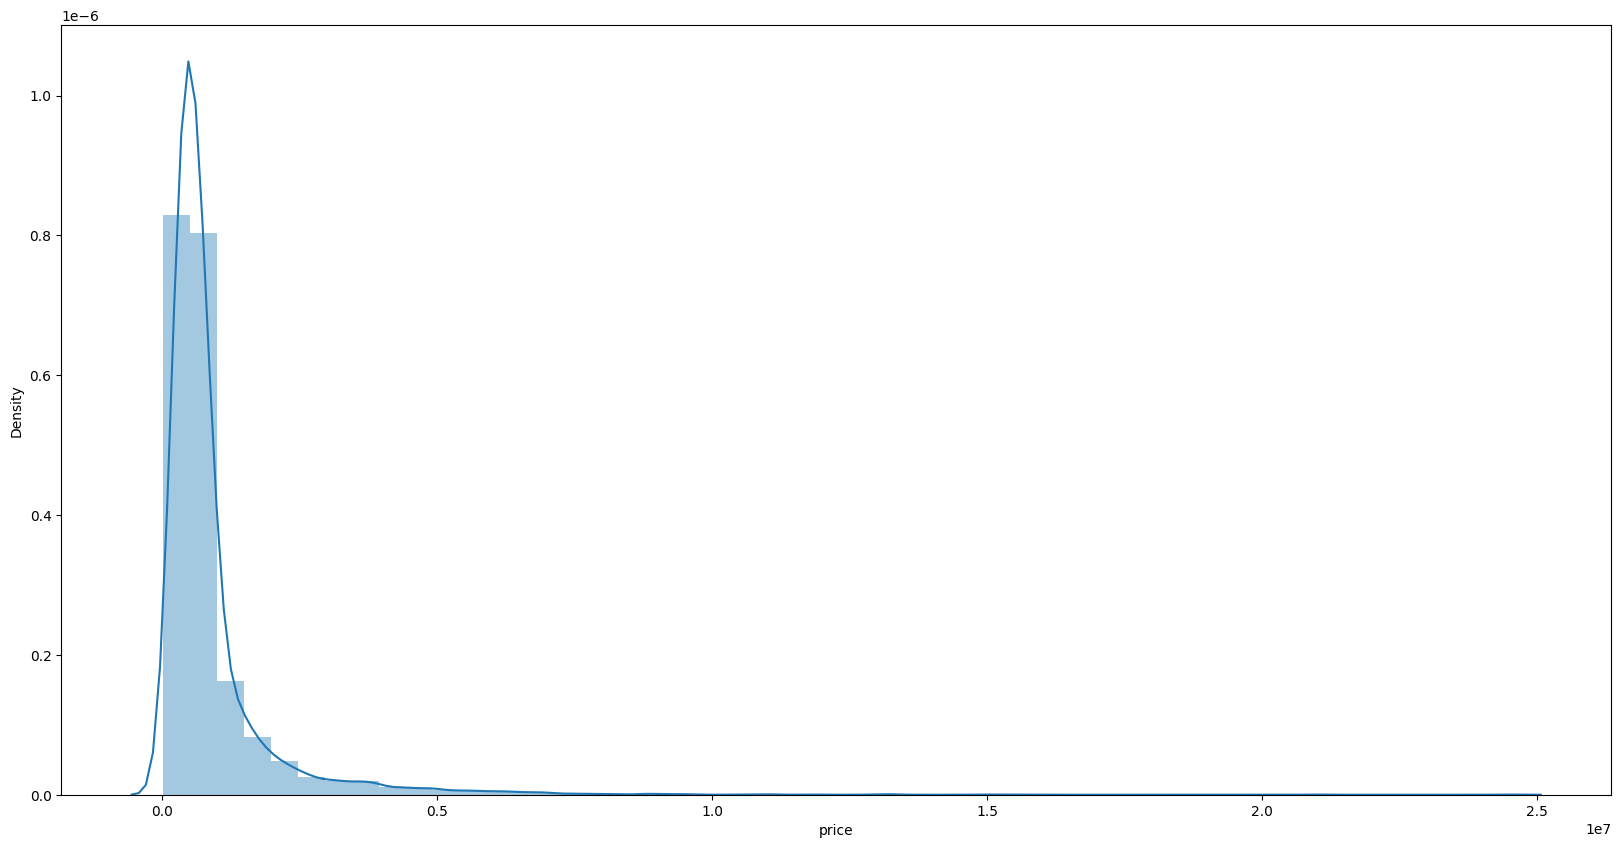

In [32]:
plt.figure(figsize = [20,10])

sns.distplot(cardata['price'])
plt.show()

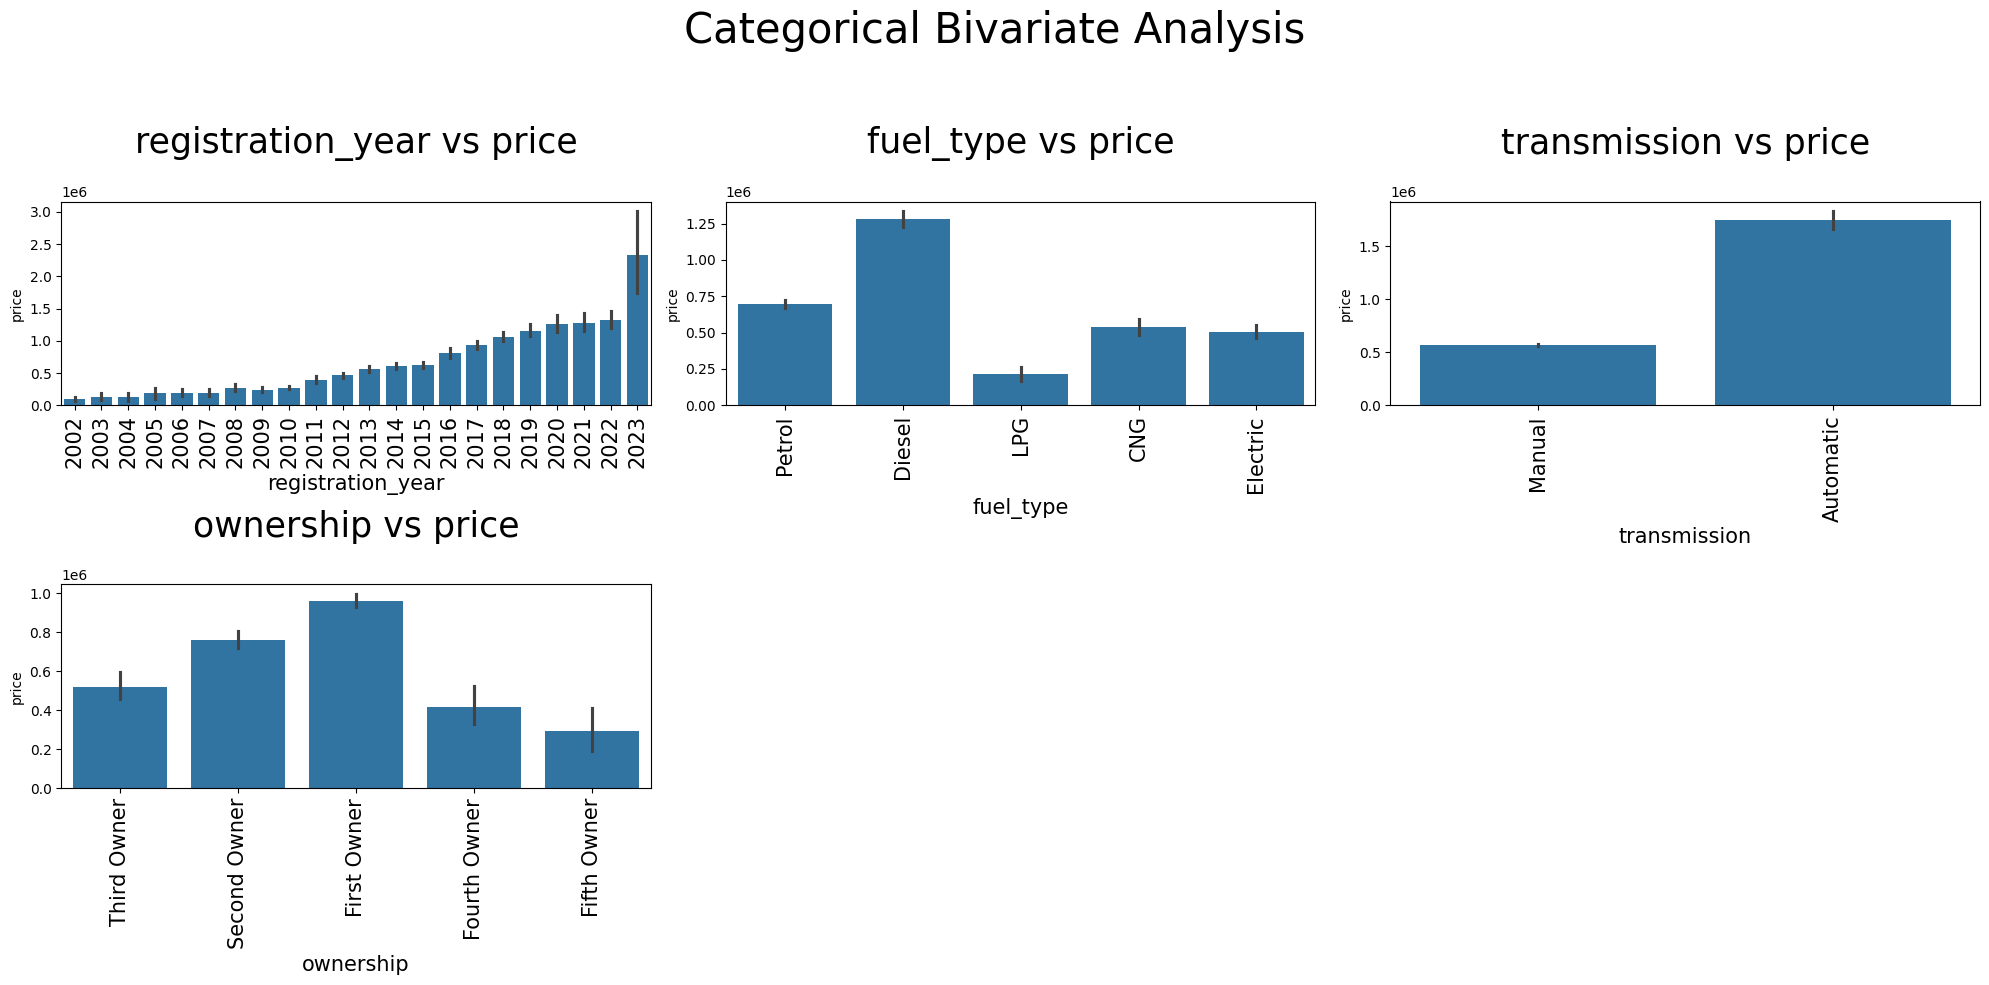

In [33]:
plt.figure(figsize = [20,10])
plt.suptitle('Categorical Bivariate Analysis\n', fontsize=30)
i=1
for col in cat_cols:
        plt.subplot(2,3,i)
        sns.barplot(x=cardata[col],y=cardata['price'])
        plt.title(f'{col} vs price\n', fontdict={'size':25})
        plt.xlabel(col, size=15)
        plt.xticks(size=15, rotation=90)
        i+=1
        
        
plt.tight_layout()
plt.show()

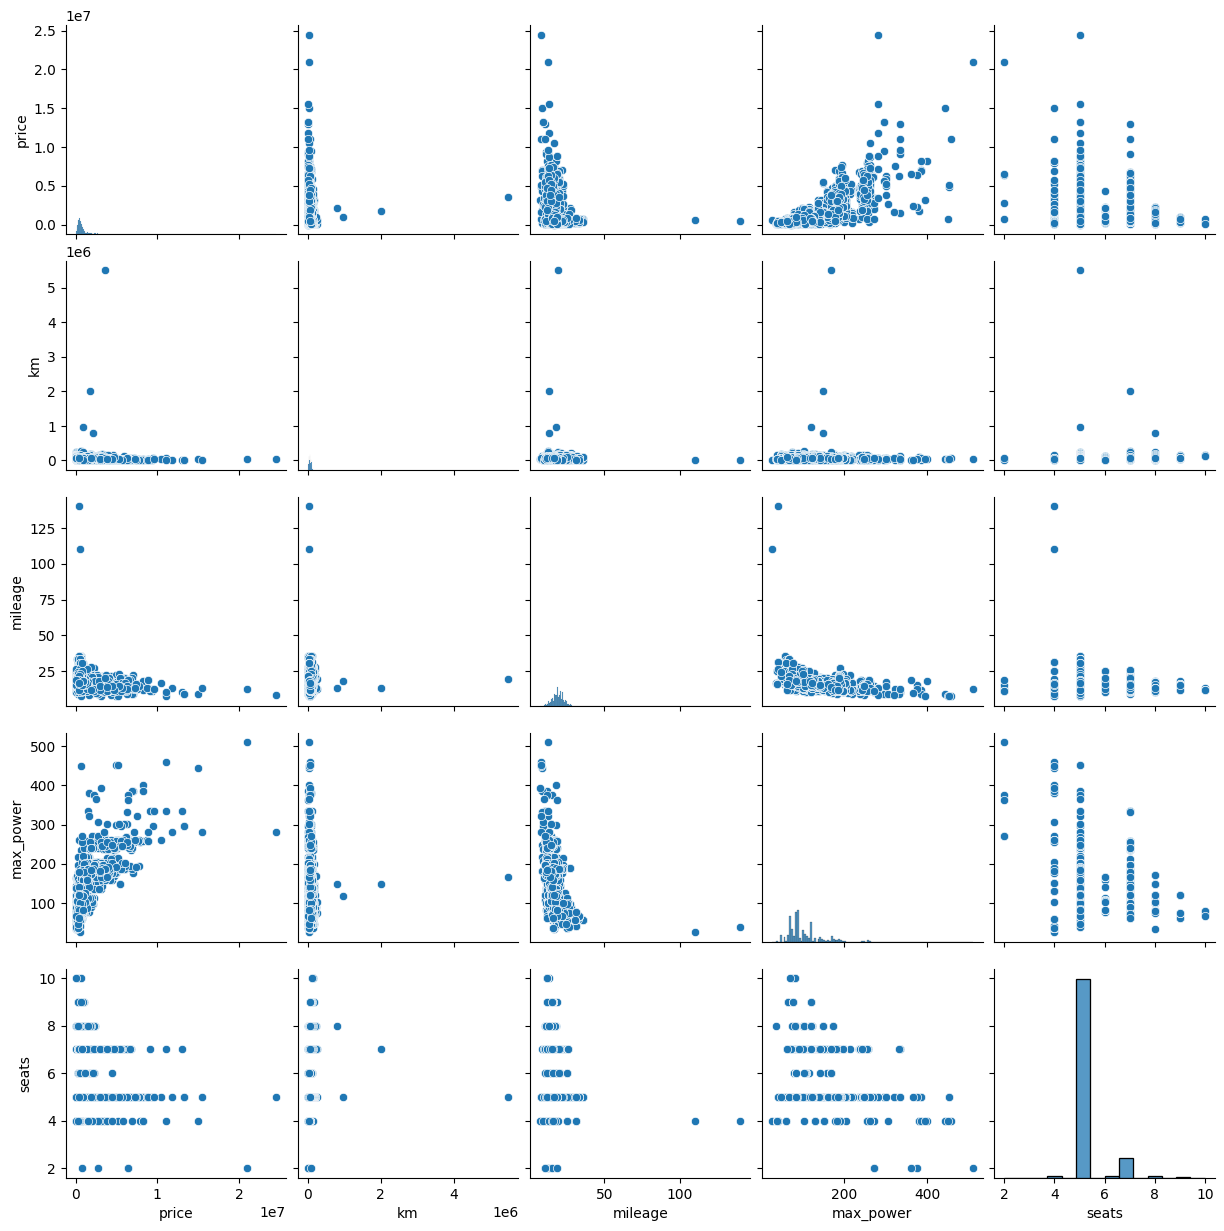

In [34]:
sns.pairplot(cardata[num_cols])
plt.show()

In [37]:
df_numeric = cardata.select_dtypes(include ="number")
df_numeric

,price,km,mileage,max_power,torque,seats
0,400000,120000,23.10,67.04,90.00,5.0
1,811000,32706,17.00,121.31,150.00,5.0
2,585000,11949,23.84,84.00,114.00,5.0
3,462000,17794,19.10,81.86,113.75,5.0
4,790000,60000,23.65,88.50,200.00,5.0
...,...,...,...,...,...,...
7996,484999,90000,15.96,62.10,195.00,7.0
7997,840000,71000,15.40,120.00,280.00,7.0
7998,900000,60000,18.00,117.60,145.00,5.0
7999,950000,20000,18.40,81.86,115.00,5.0


<Axes: >

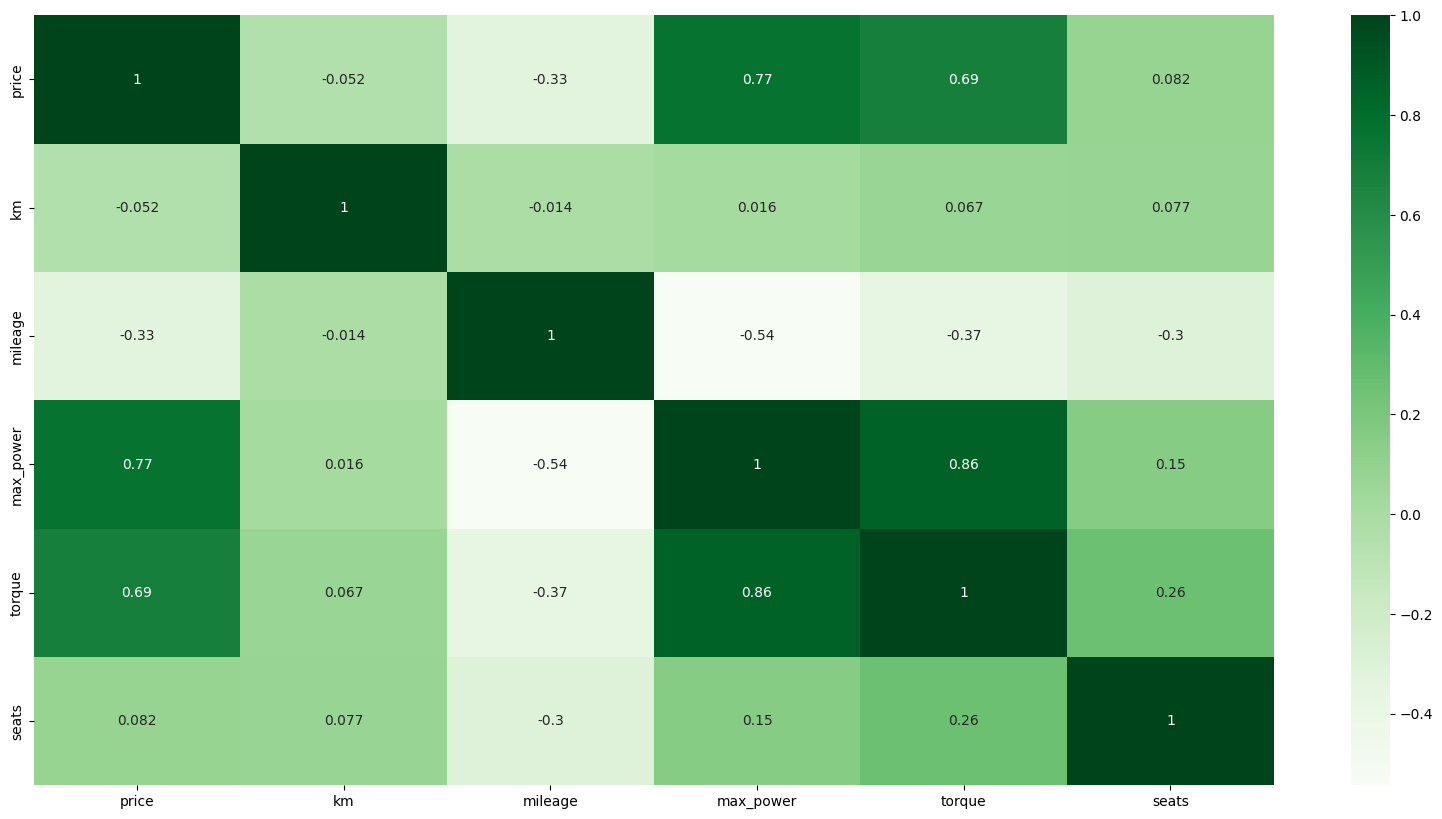

In [40]:
plt.figure(figsize = [20,10])
sns.heatmap(df_numeric.corr(),cmap='Greens', annot=True)